In [2]:
import pandas as pd
import geopandas as gpd


In [3]:
data = {
    "Name": ["New York City", "São Paulo", "Tokyo", "Lagos", "Sydney"],
    "Population": [8419600, 12325232, 13929286, 15000000, 53121631],
    "Latitude": [40.7128, -23.5505, 35.6895, 6.5244, -33.86881],
    "Longitude": [-74.0060, -46.6333, 139.6917, 3.3792, 151.2093]    
}

In [4]:
cities_df = pd.DataFrame(data)

In [5]:
gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=gpd.points_from_xy(
        cities_df['Longitude'],
        cities_df['Latitude']
    )
)

In [6]:
pip install "folium>=0.12" matplotlib mapclassify

Note: you may need to restart the kernel to use updated packages.


<Axes: >

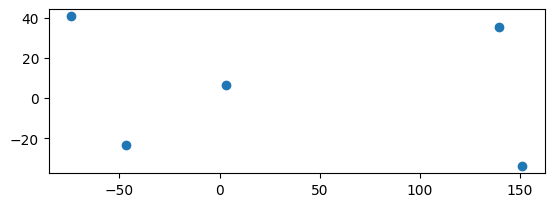

In [7]:
gdf.plot()

In [8]:
import matplotlib.pyplot as plt

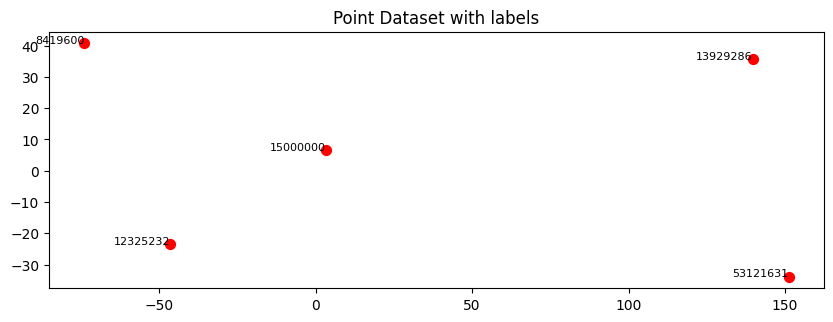

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
gdf.plot(ax=ax, color = 'red', markersize=50)
for x, y, label in zip(gdf.geometry.x, gdf.geometry.y, gdf.Population ):
    ax.text(x, y, label, fontsize=8, color='black', ha='right')
plt.title("Point Dataset with labels")
plt.show()

In [10]:
gdf = gdf.set_crs(epsg=4326)
gdf = gdf.set_crs('EPSG:4326')



In [11]:
gdf.crs

<Geographic 2D CRS: EPSG:4326>
Name: WGS 84
Axis Info [ellipsoidal]:
- Lat[north]: Geodetic latitude (degree)
- Lon[east]: Geodetic longitude (degree)
Area of Use:
- name: World.
- bounds: (-180.0, -90.0, 180.0, 90.0)
Datum: World Geodetic System 1984 ensemble
- Ellipsoid: WGS 84
- Prime Meridian: Greenwich

In [12]:
gdf.explore()

In [13]:
pip install leafmap

Note: you may need to restart the kernel to use updated packages.


In [14]:

pip install -U ipywidgets

Note: you may need to restart the kernel to use updated packages.


In [15]:
import leafmap

In [16]:
m = leafmap.Map(center=[0, 0], zoom=2)

ImportError: cannot import name 'wms_tiles' from 'leafmap.basemaps' (/Users/dokeunoh/DevOh/project/private/project/space/workspace/geopandas/.venv/lib/python3.13/site-packages/leafmap/basemaps.py)

ValueError: The Planet API Key must be provided.

In [17]:
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

In [18]:
m.add_gdf(gdf, layer_name ="Points")

In [19]:
m.add_basemap("Esri.WorldImagery")
m.add_basemap("OpenStreetMap")

OpenStreetMap has been already added before.


In [20]:
gdf.head()

,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.71280,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.55050,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.68950,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.52440,3.3792,POINT (3.3792 6.5244)
4,Sydney,53121631,-33.86881,151.2093,POINT (151.2093 -33.86881)


In [23]:
m = leafmap.Map(center=[0,0], zoom=2)
m.add_gdf(gdf, layer_name="Points", tooltip=['Name', 'Population'], popup_fields=['Name', 'Population'])
m

Map(center=[0, 0], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_out_text'…

### lonboard

- https://developmentseed.org/lonboard/latest/examples/internet-speeds/#fetch-data
- https://github.com/developmentseed/lonboard/blob/main/examples/internet-speeds.ipynb

In [29]:
pip install lonboard palettable sidecar pyarrow fastparquet

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 31.2/31.2 MB 31.1 MB/s  0:00:01m0:00:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 683.8/683.8 kB 16.8 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 21.5 MB/s  0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4/4 [fastparquet] [fsspec]
Note: you may need to restart the kernel to use updated packages.


In [35]:
from pathlib import Path

import geopandas as gpd
import pandas as pd
import shapely
from palettable.colorbrewer.diverging import BrBG_10
from sidecar import Sidecar

from lonboard import Map, ScatterplotLayer
from lonboard.colormap import apply_continuous_cmap

In [36]:
url = "https://ookla-open-data.s3.us-west-2.amazonaws.com/parquet/performance/type=mobile/year=2019/quarter=1/2019-01-01_performance_mobile_tiles.parquet"


In [37]:
local_path = Path("internet-speeds.parquet")
if local_path.exists():
    gdf = gpd.read_parquet(local_path)
else:
    columns = ["avg_d_kbps", "tile"]
    df = pd.read_parquet(url, columns=columns)

    tile_geometries = shapely.from_wkt(df["tile"])
    tile_centroids = shapely.centroid(tile_geometries)
    gdf = gpd.GeoDataFrame(df[["avg_d_kbps"]], geometry=tile_centroids, crs="EPSG:4326")
    gdf.to_parquet(local_path)

ArrowKeyError: A type extension with name pandas.period already defined

In [32]:
gdf.head()


,Name,Population,Latitude,Longitude,geometry
0,New York City,8419600,40.71280,-74.0060,POINT (-74.006 40.7128)
1,São Paulo,12325232,-23.55050,-46.6333,POINT (-46.6333 -23.5505)
2,Tokyo,13929286,35.68950,139.6917,POINT (139.6917 35.6895)
3,Lagos,15000000,6.52440,3.3792,POINT (3.3792 6.5244)
4,Sydney,53121631,-33.86881,151.2093,POINT (151.2093 -33.86881)


In [33]:
sidecar = Sidecar()

In [34]:
layer = ScatterplotLayer.from_geopandas(gdf)
m = Map(layer, _height=800)
with sidecar:
    display(m)

NameError: name 'ArrowDtype' is not defined